<a href="https://colab.research.google.com/github/Xolmatovorzu/prediction2DDOS/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22DDoSklassification_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580,0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888,0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000,0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000,0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062,0,1031.0,0.0,222222.222200,0.0,9.000000,0.0,9.000000,222222.222200,2.291111e+08,DrDoS_DNS


In [3]:
ustun=['protocol','flow_duration','jami_oldinga_paketlar','jami_orqaga_paketlar']
df.shape

(33925, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33925 entries, 0 to 33924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   protocol                       33925 non-null  int64  
 1   flow_duration                  33925 non-null  int64  
 2   total_forward_packets          33925 non-null  int64  
 3   total_backward_packets         33925 non-null  int64  
 4   total_forward_packets_length   33925 non-null  int64  
 5   total_backward_packets_length  33925 non-null  int64  
 6   forward_packet_length_mean     33925 non-null  float64
 7   backward_packet_length_mean    33925 non-null  float64
 8   forward_packets_per_second     33925 non-null  float64
 9   backward_packets_per_second    33925 non-null  float64
 10  forward_iat_mean               33925 non-null  float64
 11  backward_iat_mean              33925 non-null  float64
 12  flow_iat_mean                  33925 non-null 

In [5]:
df['label'].value_counts()

DrDoS_DNS    32797
BENIGN        1128
Name: label, dtype: int64

In [6]:
df.describe()

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds
count,33925.0,3.392500e+04,33925.000000,33925.000000,33925.000000,33925.000000,33925.000000,33925.000000,3.392500e+04,33925.000000,3.392500e+04,3.392500e+04,3.392500e+04,3.392500e+04,3.392500e+04
mean,17.0,8.597836e+04,65.513279,0.065969,29400.046573,6.161120,642.224754,3.072071,1.792975e+05,2.745483,9.789976e+03,1.991698e+03,8.961677e+03,1.793002e+05,1.270537e+08
std,0.0,1.831408e+06,89.387781,0.358186,38870.007171,37.924488,434.892441,18.898883,4.423623e+05,15.523350,3.937221e+05,2.151055e+05,3.424422e+05,4.423612e+05,3.820510e+08
min,17.0,1.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929704e-02,0.000000,0.000000e+00,0.000000e+00,3.333333e-01,3.929704e-02,0.000000e+00
25%,17.0,4.400000e+01,2.000000,0.000000,960.000000,0.000000,436.160000,0.000000,5.604045e+03,0.000000,3.800000e+01,0.000000e+00,4.400000e+01,5.604045e+03,2.358741e+06
50%,17.0,2.350000e+02,2.000000,0.000000,2672.000000,0.000000,440.000000,0.000000,9.478673e+03,0.000000,9.936683e+01,0.000000e+00,1.276667e+02,9.478673e+03,5.449393e+06
75%,17.0,2.911900e+04,178.000000,0.000000,77888.000000,0.000000,932.000000,0.000000,4.545455e+04,0.000000,2.270000e+02,0.000000e+00,2.390000e+02,4.545455e+04,4.086275e+07
max,17.0,1.183569e+08,400.000000,4.000000,176000.000000,756.000000,1472.000000,378.000000,4.000000e+06,98.154692,3.392962e+07,2.807712e+07,3.392962e+07,4.000000e+06,2.944000e+09


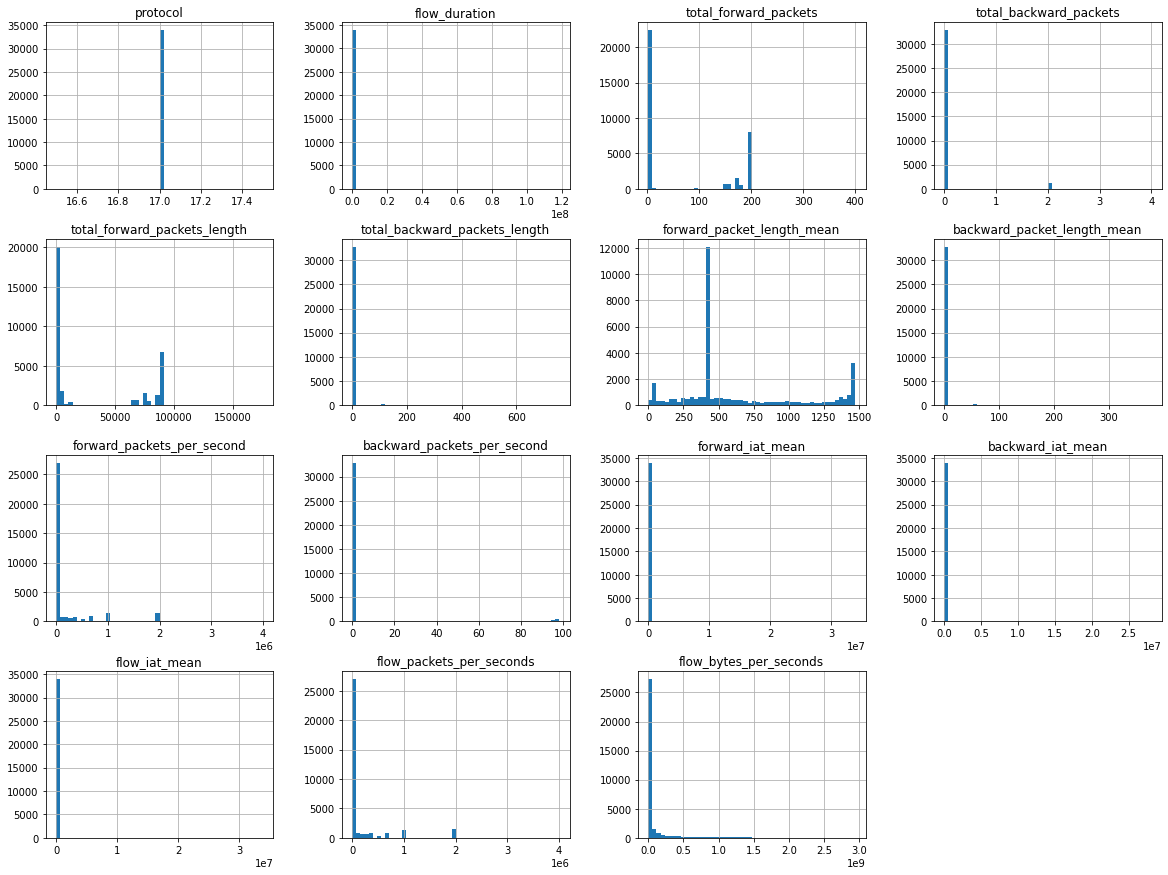

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(df, test_size=0.2, random_state=30)


In [12]:
train_set.head(10)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
9906,17,79,2,0,1246,0,623.000000,0.0,25316.455700,0.0,79.000000,0.0,79.000000,25316.455700,1.577215e+07,DrDoS_DNS
4273,17,39325,4,0,5888,0,1472.000000,0.0,101.716465,0.0,13108.333330,0.0,13108.333330,101.716465,1.497266e+05,DrDoS_DNS
30771,17,4,2,0,962,0,481.000000,0.0,500000.000000,0.0,4.000000,0.0,4.000000,500000.000000,2.405000e+08,DrDoS_DNS
26215,17,79461,200,0,88000,0,440.000000,0.0,2516.958005,0.0,399.301508,0.0,399.301508,2516.958005,1.107462e+06,DrDoS_DNS
25466,17,24815,194,0,84928,0,437.773196,0.0,7817.852106,0.0,128.575130,0.0,128.575130,7817.852106,3.422446e+06,DrDoS_DNS
2919,17,27144,158,0,69232,0,438.177215,0.0,5820.807545,0.0,172.891720,0.0,172.891720,5820.807545,2.550545e+06,DrDoS_DNS
4814,17,183439,174,0,76272,0,438.344828,0.0,948.544203,0.0,1060.341040,0.0,1060.341040,948.544203,4.157894e+05,DrDoS_DNS
19795,17,65938,200,0,88000,0,440.000000,0.0,3033.152355,0.0,331.346734,0.0,331.346734,3033.152355,1.334587e+06,DrDoS_DNS
4909,17,55072,150,0,65424,0,436.160000,0.0,2723.707147,0.0,369.610738,0.0,369.610738,2723.707147,1.187972e+06,DrDoS_DNS
32978,17,30890,200,0,88000,0,440.000000,0.0,6474.587245,0.0,155.226131,0.0,155.226131,6474.587245,2.848818e+06,DrDoS_DNS


In [13]:
test_set.head(10)

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
10605,17,86,2,0,872,0,436.000000,0.0,23255.813950,0.0,86.000000,0.0,86.000000,23255.813950,1.013953e+07,DrDoS_DNS
15232,17,54,2,0,2656,0,1328.000000,0.0,37037.037040,0.0,54.000000,0.0,54.000000,37037.037040,4.918519e+07,DrDoS_DNS
30136,17,31231,200,0,87280,0,436.400000,0.0,6403.893567,0.0,156.939698,0.0,156.939698,6403.893567,2.794659e+06,DrDoS_DNS
16148,17,16618,200,0,88000,0,440.000000,0.0,12035.142620,0.0,83.507538,0.0,83.507538,12035.142620,5.295463e+06,DrDoS_DNS
4993,17,51039,200,0,88000,0,440.000000,0.0,3918.572072,0.0,256.477387,0.0,256.477387,3918.572072,1.724172e+06,DrDoS_DNS
30929,17,10,2,0,278,0,139.000000,0.0,200000.000000,0.0,10.000000,0.0,10.000000,200000.000000,2.780000e+07,DrDoS_DNS
24095,17,46,2,0,2126,0,1063.000000,0.0,43478.260870,0.0,46.000000,0.0,46.000000,43478.260870,4.621739e+07,DrDoS_DNS
16245,17,30048,174,0,75984,0,436.689655,0.0,5790.734824,0.0,173.687861,0.0,173.687861,5790.734824,2.528754e+06,DrDoS_DNS
4143,17,23751,150,0,65424,0,436.160000,0.0,6315.523557,0.0,159.402685,0.0,159.402685,6315.523557,2.754579e+06,DrDoS_DNS
33243,17,214038,200,0,88000,0,440.000000,0.0,934.413515,0.0,1075.567839,0.0,1075.567839,934.413515,4.111419e+05,DrDoS_DNS


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
sc = StandardScaler()
sc.fit(train_set)
X_train_std = sc.transform(train_set)
X_test_std = sc.transform(test_set)